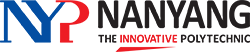

# Practical 4b: Visualise Text Data

## Objectives
* Demonstrate different techniques to extract relevant text for visualisation.

Text Visualisation includes techniques for visually representing raw text data or the results of text analysis methodologies. Effective and meaningful visualisatipons convince audiences of the message and help them understand the findings. In this practical we will explore the elements that make an effective visualisation and the factors that should be considered when choosing a visual representation of the result of the text analysis. 

We will explore examples of text vsiualisation using different visualisation techniques.


## Read the text data
In this practical, we will be using the dataset in NLTK library for visualisation. 

In [1]:
# Importing data
import nltk
from nltk.corpus import webtext
nltk.download('webtext')
nltk.download('punkt')
nltk.download('punkt_tab')

wt_sentences = webtext.sents('firefox.txt')
wt_words = webtext.words('firefox.txt')

[nltk_data] Downloading package webtext to /Users/wong/nltk_data...
[nltk_data]   Package webtext is already up-to-date!
[nltk_data] Downloading package punkt to /Users/wong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/wong/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## Import necessary libraries
Import library for computing frequency

In [2]:
# Import libraries
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string

## Check number of words in teh data
Execute the code below to count the number of words

In [3]:
# count number of words
print(len(wt_sentences))
print(len(wt_words))

1144
102457


## Compute the frequency of all words
Execute the following codes to generate the frequency for all the words:
```Python
# generate frequency for all the words
freq_dist = nltk.FreqDist(wt_words)

# show the top few results
freq_dist
```

In [4]:
# generate frequency for all the words
freq_dist = nltk.FreqDist(wt_words)

# show the top few results
freq_dist

FreqDist({'.': 2428, 'in': 2203, 'to': 2130, '"': 1971, 'the': 1762, "'": 1507, 'not': 1472, '-': 1372, 'when': 1255, 'on': 1193, ...})

Execute the following codes to sort the frequency in descending order:
```Python
sorted_freqdist = sorted(freq_dist, key=freq_dist.__getitem__, reverse=True)
sorted_freqdist
```

In [5]:
sorted_freqdist = sorted(freq_dist, key=freq_dist.__getitem__, reverse=True)
sorted_freqdist

['.',
 'in',
 'to',
 '"',
 'the',
 "'",
 'not',
 '-',
 'when',
 'on',
 'a',
 'is',
 't',
 'and',
 'of',
 '(',
 'page',
 'for',
 'with',
 ')',
 'window',
 'Firefox',
 'does',
 'from',
 'open',
 ':',
 'menu',
 'should',
 'bar',
 'tab',
 'doesn',
 'after',
 'Firebird',
 'new',
 'work',
 'browser',
 'if',
 'be',
 '0',
 'toolbar',
 'button',
 'bookmarks',
 'dialog',
 'bookmark',
 'as',
 'file',
 'URL',
 'download',
 'crashes',
 'I',
 'no',
 'text',
 'are',
 'or',
 'up',
 'crash',
 'click',
 'tabs',
 'Bookmarks',
 'link',
 '/',
 'firefox',
 'manager',
 '+',
 'using',
 'it',
 'Mozilla',
 'default',
 'error',
 'all',
 'an',
 'clicking',
 's',
 'windows',
 'search',
 'folder',
 ']',
 'Phoenix',
 '1',
 'at',
 'icon',
 'Manager',
 'by',
 'this',
 'site',
 'can',
 'files',
 'Page',
 'fails',
 'causes',
 'use',
 'close',
 '[',
 'opening',
 'Toolbar',
 'Add',
 'has',
 'Bookmark',
 'right',
 'display',
 'down',
 'that',
 'theme',
 'box',
 'Download',
 '9',
 'The',
 'pages',
 'firebird',
 'only',
 'ur

## Consider words with length greater than 3
Excute the code below to filter and keep only words/terms if their frequency is greater than 3.
```Python
# create a dictionary of key and value
# keep words only if their frequency is > 3
filtered_words = dict([(k,v) for k,v in freq_dist.items() if len(k)>3])

# create frequency distribution of the filtered words
freq_dist = nltk.FreqDist(filtered_words)

# plot the frequency distribution of the top 50 words
freq_dist.plot(50, cumulative=False)
```

Matplotlib is building the font cache; this may take a moment.


<Axes: xlabel='Samples', ylabel='Counts'>

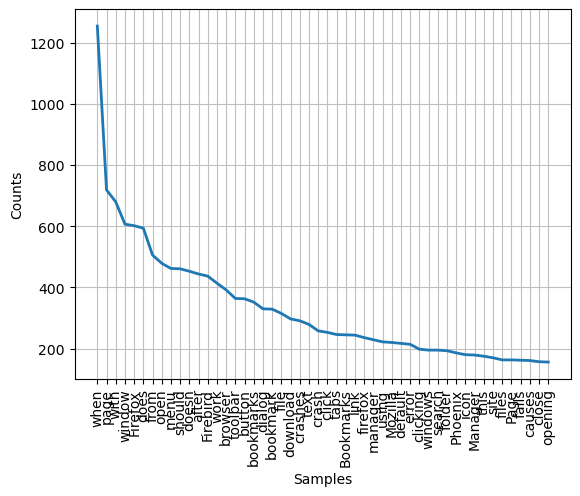

In [6]:
# create a dictionary of key and value
# keep words only if their frequency is > 3
filtered_words = dict([(k,v) for k,v in freq_dist.items() if len(k)>3])

# create frequency distribution of the filtered words
freq_dist = nltk.FreqDist(filtered_words)

# plot the frequency distribution of the top 50 words
freq_dist.plot(50, cumulative=False)

## Build Wordcloud
A word cloud in Python visually represents text data. Also called a tag cloud, it uses different font sizes and colors to highlight the importance of each word. This way, the most prominent terms will come across to the user. Wordcloud is the pictorial representation of the most frequently repeated words representing the size of the word. 

To install the wordcloud library:
> Type this command in jupyter or anaconda prompt: **pip install wordcloud**


In [9]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


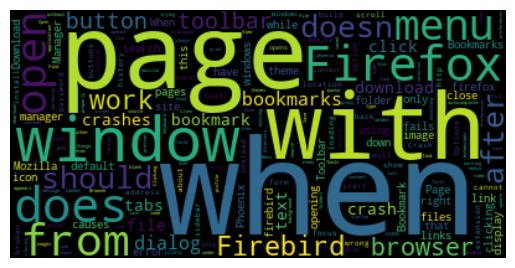

In [10]:
# build wordcloud
from wordcloud import WordCloud
wcloud = WordCloud().generate_from_frequencies(freq_dist)

# plot the wordcloud
import matplotlib.pyplot as plt
plt.imshow(wcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Exercise
Try the following tasks:
1. Remove the stop words and then build the word cloud.

You can use the following codes to remove stopwords:

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# import stopwords
stop = stopwords.words('english')
filtered_words=[x for x in wt_words if x not in stop]
filtered_words

# create frequency distribution of the filtered words
freq_dist = nltk.FreqDist(filtered_words)

# plot the frequency distribution of the top 50 words
freq_dist.plot(50, cumulative=False)

wcloud = WordCloud().generate_from_frequencies(freq_dist)
plt.imshow(wcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Network Graph
Network visualisation are the current state of the art for text, as shown by the predominance of network style visualisations. They are particularly popular for social network analysis. Such graphs are useful to illustrate relationships between entities, documents, and even concepts within a corpus. 

**textnets** represents collections of texts as network of documents and words. 

To install the textnets library and download the en_core_web_sm trained English pipeline from spacy:
> Type this command in jupyter or anaconda prompt: 

> **pip install --user textnets**

Should you encounter error in installing textnets, do look through the error code to understand. 
For the following error message , it may suggest there is missing component in Microsoft Visual C++ file: 
E.g. error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools"

Suggested Components for installation:

- Visual C++ Build tools core features.

- MSVC toolset C++ 2019 v142 (x86,x64).

- Visual C++ 2019 Redistributable Update.

- Windows 10 SDK (10.0.17763.0) for Desktop C++.

> **pip install spacy**

> **!python -m spacy download en_core_web_sm**

Let's walkthrough the steps to analyse and visualise text data using **textnets**. We start with importing the library. You can set a fixed seed to ensure that the results are reproducible across runs.

```Python
# import library
import textnets as tn

# fixed seed for reproducible
tn.params['seed']=42
```

In [11]:
pip install --user textnets

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-3.0.11-py2.py3-none-any.whl.metadata (3.2 kB)
Using cached Cython-3.0.11-py2.py3-none-any.whl (1.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 2.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 4.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 3.6 MB/s eta 0:00:0000:0100:01
  Created wheel for textnets: filename=textnets-0.9.4-cp311-cp311-macosx_15_0_arm64.whl size=121980 sha256=2ec6d42a53244f83d5f0b265b8718369fb893c8e8b564465bc9abda48e1675eb
  Stored in directory: /Users/wong/Library/Caches/pip/wheels/06/40/b9/7022d030a907e476577a471a35b3072c56970b5505fa04203b
Successfully built textnets
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to u

In [7]:
pip install cairocffi

Note: you may need to restart the kernel to use updated packages.


In [12]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 3.3 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


We will construct the corpus using the example data from textnets. **moon_landing** is example dataset with newspaper headlines about the Apollo 11 landing. The corpus contains 7 documents.

```Python
# construct corpus
corpus = tn.Corpus(tn.examples.moon_landing)
corpus
```

In [1]:
# import library
import textnets as tn

# fixed seed for reproducible
tn.params['seed']=42

In [2]:
# construct corpus
corpus = tn.Corpus(tn.examples.moon_landing)
corpus

<Corpus with 7 documents using language model 'en_core_web_sm'>

Next, we will create the textnet. The corpus is tokenized with all defaults (removing stop words, applying stemming, and removing punctuation marks, numbers, URLs, etc). The min_docs allow us to set the minimum number of documents a word should appear. In this case, we are setting it to one, opting to keep even words that appear in only one document (that is, a single newspaper headline).

When dealing with large corpora, you may also want to set the remove_weak_edges to True to remove edges with a weight far below the average. This will result in a sparser graph.

```Python
# create textnet
t = tn.Textnet(corpus.tokenized(), min_docs=1)

# plot the textnet
t.plot(label_nodes=True,
       show_clusters=True)
```
The show_clusters options identifies document-term groups that appear to form par of the same theme in the texts.

In [3]:
# create textnet
t = tn.Textnet(corpus.tokenized(), min_docs=1)

# plot the textnet
t.plot(label_nodes=True,
       show_clusters=True)

  0%|          | 0/7 [00:00<?, ?docs/s]

AttributeError: Plotting not available; please install pycairo or cairocffi

We can also visualise the term network. Aside from visualisation, we can also analyse our corpus using network metrics. 

```Python
# create term network
words = t.project(node_type="term")
```
We will plot the term network scaling nodes according to their betweenness centrality, and pruning edges from the network using "backbone extraction". Instead of showing the clusters, we will use color_clusters to color nodes according to their partition. We can also filter nodel labels, labeling only those nodes that have a betweenness centrality score above the media. This is particularly useful in high-order networks where labeling every single node would cause too much visual clutter.
```Python
# plot the term network
words.plot(label_nodes=True,
           scale_nodes_by="betweenness",
           color_clusters=True,
           alpha=0.5,
           edge_width=[10*w for w in words.edges["weight"]],
           edge_opacity=0.4,
           node_label_filter=lambda n: n.betweenness() > words.betweenness.median())

```

In [5]:
# create term network
words = t.project(node_type="term")
# plot the term network
words.plot(label_nodes=True,
           scale_nodes_by="betweenness",
           color_clusters=True,
           alpha=0.5,
           edge_width=[10*w for w in words.edges["weight"]],
           edge_opacity=0.4,
           node_label_filter=lambda n: n.betweenness() > words.betweenness.median())

/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/wong/.local/lib/python3.11/site-packages/textnets/network.py:889: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  return quad(integrand, 0, norm_weight, args=(degree))


  0%|          | 0/8 [00:00<?, ?edges/s]

AttributeError: Plotting not available; please install pycairo or cairocffi

## Additional Learning
Refer to this guide to find out more on textnets:
1. https://textnets.readthedocs.io/en/stable/tutorial.html#example

### Exercise
Load the **tripadvisor_hotel_reviews.csv** dataset into panda dataframe. Try the following tasks:
1. Create a network graph for analysis

You can use the following codes to create a corpus from Pandas:
```Python
corpus = tn.Corpus.from_df(df, doc_col="Review")
```